# Individual Planning Report 


## Data Description

Firstly, I will load all necessary libraries and players.csv and sessions.csv. 

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_url <- "https://raw.githubusercontent.com/604Beast/Project-Planning-Stage/refs/heads/main/players.csv"
players_data <- read_csv(players_url)
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


From the output above, we see there are 196 observations in the players data set. 
The 7 variables of the players dataset are: 
1. **experience(chr)**: Beginner to Veteran
2. **subscribe(lgl)**: subscribed to game-related newsletter(TRUE or FALSE) 
3. **hashedEmail(chr)**: encrypted email address of player
4. **play_hours(dbl)**: total time(hours) spent playing Minecraft
5. **name(chr)**:name of the player 
6. **gender(chr)**: players can identify as male, female, non-binary, two-spirited or other or prefer not to say
7. **age(dbl)**:age in years
   


Potential issues:
- Age is a double data type, but age isn't reported in decimals. So, it could be an integer. 
- Did participants under the age of majority get parental consent?
- How was the experience level determined? 

In [3]:
sessions_url <- "https://raw.githubusercontent.com/604Beast/Project-Planning-Stage/refs/heads/main/sessions.csv"
sessions_data <- read_csv(sessions_url)
sessions_data 

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


From the output above, we see there are 1535 observations in the sessions dataset.

The 5 variables of the sessions dataset are: 
1. **hashedEmail(chr)**:encrypted email address of player
2. **start_time(chr)**:date as DD/MM/YEAR and start time (24-hour clock) of session
3. **end_time(chr)**:date as DD/MM/YEAR and end time(24-hour clock) of session
4. **orginal_start_time(dbl)**:start time is converted to milliseconds
5. **orginal_end_time(dbl)**:end time is converted to milliseconds

Potential issues: 

 - Difficult to see exactly how many sessions each user has.
 - Gaming setup, network status, and server traffic affecting time of sessions 

Secondly, I will compute the all-summary statistics. Sessions dataset will be done first because it has only has 2 variables 

In [4]:
sessions_summary<- sessions_data |>
                    summarize( min_original_start_time = min(original_start_time,na.rm = TRUE),
                              mean_original_start_time = mean(original_start_time,na.rm = TRUE), 
                              max_original_start_time = max(original_start_time,na.rm = TRUE), 
                            min_original_end_time = min(original_end_time, na.rm = TRUE),
                              mean_original_end_time = mean(original_end_time,na.rm = TRUE), 
                              max_original_end_time = max(original_end_time,na.rm = TRUE),)|>
                        round(digits = 2)
sessions_summary

min_original_start_time,mean_original_start_time,max_original_start_time,min_original_end_time,mean_original_end_time,max_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.719201e+12,1.72733e+12,1.7124e+12,1.719196e+12,1.72734e+12


In [5]:
players_summary_subscribe <- players_data |>
                group_by(subscribe) |>
                summarize( min_played_hours = min(played_hours), mean_played_hours = mean(played_hours), 
                          max_played_hours = max(played_hours), 
                          min_age = min(Age, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE), max_age = max(Age,na.rm = TRUE), 
                         number_of_players = n()) |>
                round(digits = 2) 

players_summary_subscribe

subscribe,min_played_hours,mean_played_hours,max_played_hours,min_age,mean_age,max_age,number_of_players
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0.50,7.1,17,23.75,57,52
1,0,7.78,223.1,9,20.18,58,144


In the summary statistics above, to clarify subscribe is either 0(FALSE) or 1(TRUE)

## Questions 

To help the Wood lab with their Minecraft server, my project plan will address the board question: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

After viewing data from the players.csv, my specific question is "Can age and hours played predict subscribing behaviours in  players.csv?". The dataset has both age and hours played, which can be used for predictive analysis. I will be changing the subscribe variable to fct using as.factor function to apply K-NN classification. Also, the new data frame will only have subscribe, hours played and age. 


## Exploratory Data Analysis ad Visualization

As requested in the assignment, `players.csv` quantitative variables mean: 

In [ ]:
players_mean <- players_data|>
            select(played_hours, Age) |>
            map_df(mean, na.rm = TRUE)|>
            round(digits = 2) 

players_mean

The following code below will generate a plot between age and hours played to visualize the relationship

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


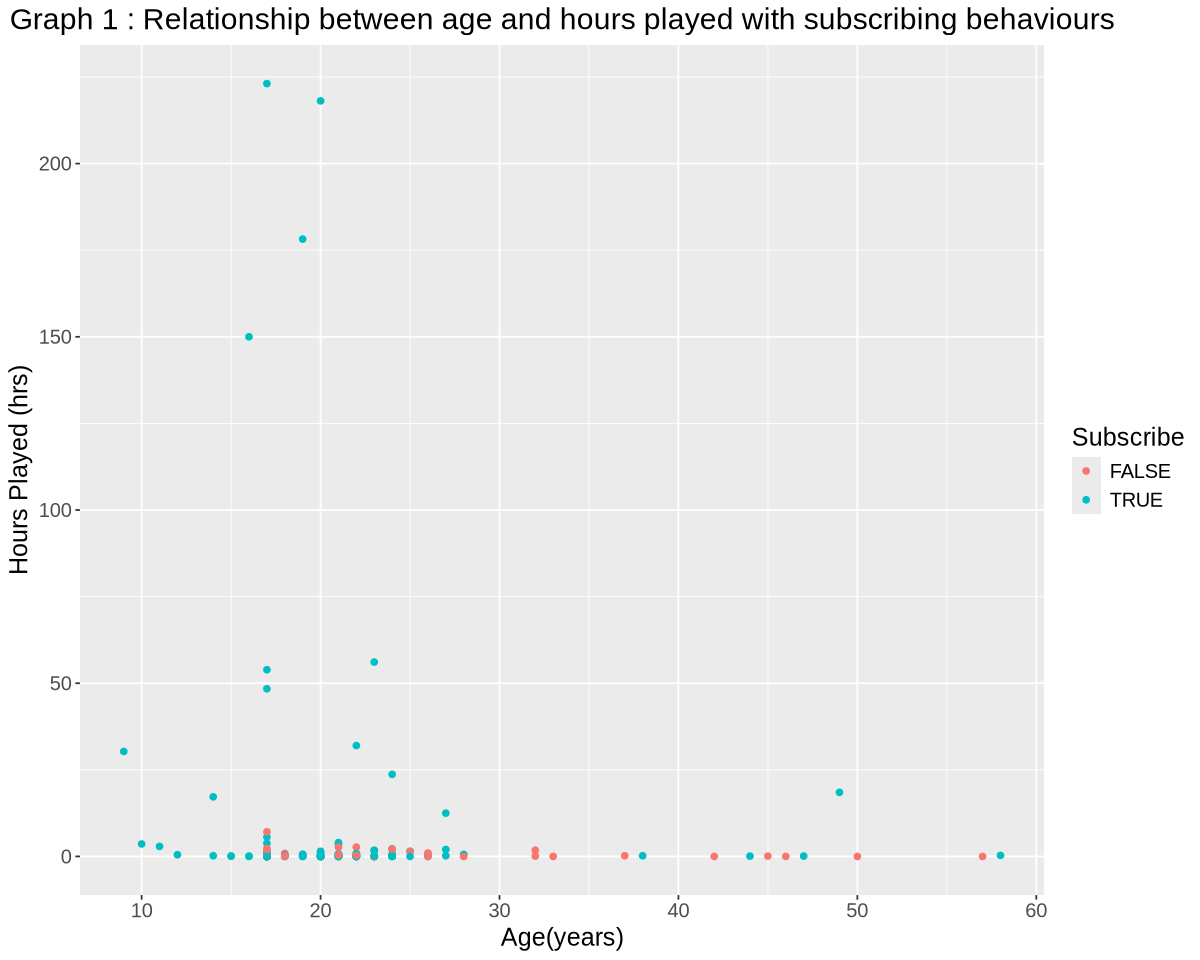

In [7]:
options(repr.plot.width = 10, repr.plot.height = 8)
player_plot_subscribe <- ggplot(players_data, aes( x = Age, y = played_hours, color = subscribe))+
                    geom_point()+
                    ggtitle("Graph 1 : Relationship between age and hours played with subscribing behaviours") + 
                    labs( x = "Age(years)", y = "Hours Played (hrs)", color = "Subscribe")+ 
                    theme(text = element_text(size = 15)) +
                    theme(plot.title = element_text(hjust =0.5))
                    
player_plot_subscribe


Insights: 
 - All graphs show NO linear relationship between age and hours played, which could be a potenital problem
 - Graph 1 does indicate players with higher hours played are subscribed.
 - Graph 2 shows some regular(over 150hrs) and amateur(50hrs to 150hrs) players played more than other levels
 - Graph 3 shows there are more males playing than other genders,and 1 male player has close to 250 hrs played just below that is a player that idenfies as other. There are 2 females between 150 hrs and 200 hrs.


## Proposed Method: 



The predictive method that will be used is KNN classification on the players dataset, rather than the sessions dataset, because the chosen variables are only available in the players data.  This method is appropriate because we are predicting subscription behaviour (a label) of a player, given their `age` and `hours played`(predictors).

This method does not assume a certain distribution in the data; it uses straight-line distance to assign a label. Addaitnoly, a  ponential limitaion is imbalanced data; thus, I will use the `recipe` and `bake` function to be center and scale to balance the data.


Comparing and selecting the model:

Splitting:






### GitHub Repository 

https://github.com/604Beast/Project-Planning-Stage/tree/main
